In [28]:
import numpy as np
import math

In [29]:
d = [1,0,1,1,0,1]
x = [2,0,1,2,0,1]
print([d_i/max(d) for d_i in d])
print([d_i/max(x) for d_i in x if d_i != 2])
def n_dif(n,x,d):
    m_x = max([x_i for x_i in x if x_i !=2]) 
    d_x = max([d_i for d_i in d if d_i !=2]) 
    d = [ math.fabs((i1/m_x)-(i2/d_x))  for i1,i2 in zip(x,d) if i1 != 2]
    return sum(sorted(d)[:n])    
#fix 2 issue
#zero issue
n_dif(3,x,d)

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
[0.0, 0.5, 0.0, 0.5]


0.0

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image as RGB
img = Image.open("homer_gray_scale.png").convert("RGB")
grayscale_image = img.convert("L")
gray = np.array(img)
gray.shape

(407, 406, 3)

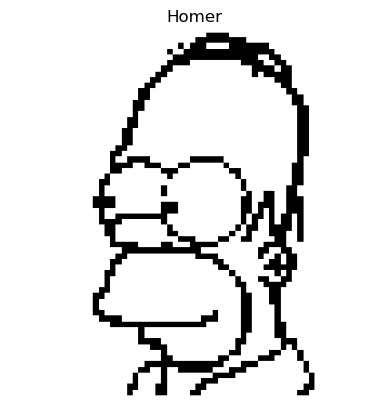

In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image as RGB
img = Image.open("homer_bw.png").convert("RGB")
arr = np.array(img)

# Create binary mask: 1 if any channel > 0, else 0
binary = (arr > 0).any(axis=-1).astype(np.uint8)


# Visualize
plt.imshow(binary, cmap='gray')
plt.title("Homer")
plt.axis("off")
plt.show()


In [32]:
sz =binary.shape[0]*binary.shape[1]

In [33]:
target_size = binary.shape # (width, height)

# Load the image you want to resize
bart = Image.open("bart.png").convert("RGB")
# Resize it to match the target image
bart = bart.resize(target_size)
bart = np.array(bart)
bart = (bart > 0).any(axis=-1).astype(np.uint8)
# Load the image you want to resize
lisa = Image.open("lisa.png").convert("RGB")
# Resize it to match the target image
lisa = lisa.resize(target_size)
lisa = np.array(lisa)
lisa = (lisa > 0).any(axis=-1).astype(np.uint8)
# Load the image you want to resize
marg = Image.open("marg.png").convert("RGB")
# Resize it to match the target image
marg = marg.resize(target_size)
marg = np.array(marg)
marg = (marg > 0).any(axis=-1).astype(np.uint8)

In [34]:
bad = np.random.randint(0,2,binary.shape) + binary 
bad = (bad > 1).astype(np.uint8)
bad.shape = binary.shape

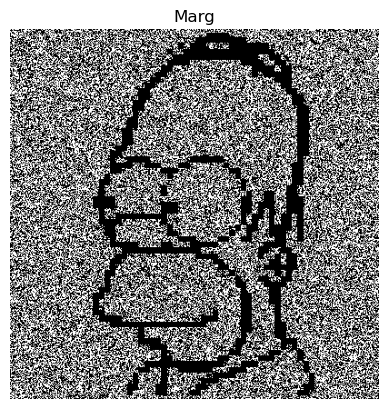

In [35]:
plt.imshow(bad, cmap='gray')
plt.title("Marg")
plt.axis("off")
plt.show()

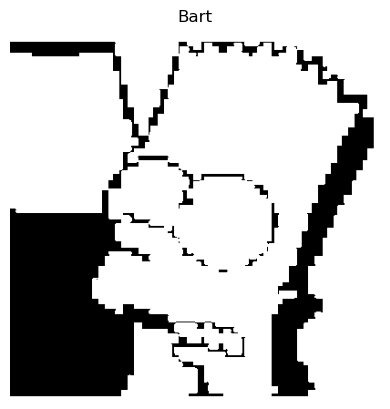

In [36]:
plt.imshow(bart, cmap='gray')
plt.title("Bart")
plt.axis("off")
plt.show()

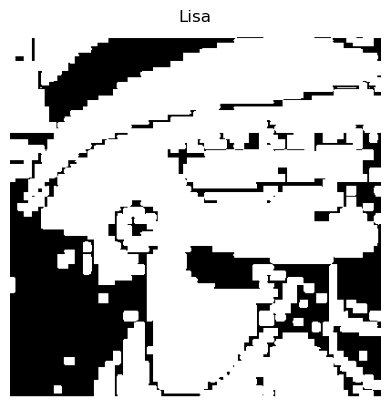

In [37]:
plt.imshow(lisa, cmap='gray')
plt.title("Lisa")
plt.axis("off")
plt.show()

In [41]:
test = np.array([2]*sz)
test[sz//2:]=binary.flatten()[sz//2:]
test.shape = binary.shape



In [42]:
n_dif(int(sz*0.4),bad.flatten(),binary.flatten())

0.0

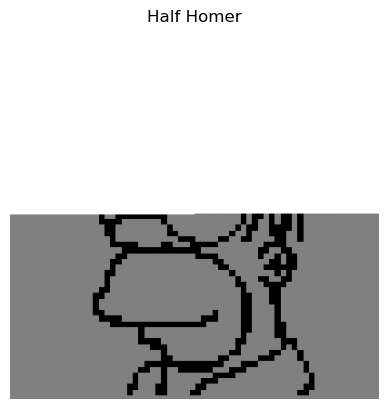

In [43]:
plt.imshow(test, cmap='gray')
plt.title("Half Homer")
plt.axis("off")
plt.show()


In [51]:
n_dif(int(sz*0.3),test.flatten(),binary.flatten())

0.0

In [52]:
n_dif(int(sz*0.3),test.flatten(),bart.flatten())

2986.0

In [47]:
n_dif(int(sz*0.4),test.flatten(),lisa.flatten())

21818.0

In [48]:
n_dif(int(sz*0.4),test.flatten(),marg.flatten())

6510.0

In [58]:
n_dif(int(sz),test.flatten(),gray.flatten())

np.int64(1668547153)

In [60]:
test2 = np.array([2]*sz)
test2[:sz//2]=gray.flatten()[:sz//2]
test2.shape = gray.shape

ValueError: cannot reshape array of size 165242 into shape (407,406,3)